In [1]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.tail(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
48746,1976950,Desktop Dungeons: Rewind,2023-04-18,True,False,False,Very Positive,84,259,16.99,19.99,15.0,True
48747,2166910,呆呆大冒险,2023-02-22,True,False,False,Positive,100,18,0.00,0.00,0.0,True
48748,1202930,Boom Boomerang,2020-08-31,True,False,False,Positive,81,11,0.00,0.00,0.0,True
48749,1218360,Luna : The Dimension Watcher,2020-06-04,True,True,False,Mixed,63,41,0.00,0.00,0.0,True
48750,2280000,SQUARE ENIX AI Tech Preview: THE PORTOPIA SERI...,2023-04-23,True,False,False,Very Negative,13,341,0.00,0.00,0.0,True
48751,2302650,Cat Girl Creator,2023-02-14,True,True,False,Mixed,53,13,0.00,0.00,0.0,True
48752,1434540,Zoeti,2023-04-20,True,False,False,Positive,93,32,17.99,19.99,10.0,True
48753,2248870,Little white man,2022-12-23,True,False,False,Mixed,50,10,0.00,0.00,0.0,True
48754,2380460,Walkabout Mini Golf: Temple at Zerzura,2023-04-20,True,False,False,Positive,92,13,3.99,3.99,0.0,True
48755,596500,Chippy & Noppo,2023-03-08,True,False,False,Positive,90,11,17.99,19.99,10.0,True


In [4]:
df.dtypes

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object

In [5]:
#elimina las columnas que no se van a utilizar
df.drop(['title','date_release','rating','steam_deck'],axis=1,inplace=True)

In [6]:
# Análisis de correlación
corr = df.corr()
corr.style.background_gradient()


,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount
app_id,1.000000,-0.023732,-0.177454,-0.151239,0.155888,-0.036499,-0.020939,-0.012846,0.014311
win,-0.023732,1.000000,0.073223,0.057304,-0.103214,0.005394,0.034773,0.037978,0.016984
mac,-0.177454,0.073223,1.000000,0.631572,0.074308,0.019241,-0.005611,-0.011133,-0.036486
linux,-0.151239,0.057304,0.631572,1.000000,0.069807,0.020728,-0.007876,-0.010080,-0.019996
positive_ratio,0.155888,-0.103214,0.074308,0.069807,1.000000,0.022174,-0.002469,0.001412,-0.005655
user_reviews,-0.036499,0.005394,0.019241,0.020728,0.022174,1.000000,0.033216,0.029512,-0.004406
price_final,-0.020939,0.034773,-0.005611,-0.007876,-0.002469,0.033216,1.000000,0.963527,-0.132361
price_original,-0.012846,0.037978,-0.011133,-0.010080,0.001412,0.029512,0.963527,1.000000,0.042259
discount,0.014311,0.016984,-0.036486,-0.019996,-0.005655,-0.004406,-0.132361,0.042259,1.000000


In [7]:
# Inicializamos el Modelo
linear = linear_model.LinearRegression()

In [8]:
# Definimos las variables independientes y dependientes
data_x = df.drop(['app_id','win','mac','linux','positive_ratio','user_reviews','price_final','discount'], axis=1)
data_y = df.price_final

In [9]:
# Dividimos los datos en entrenamiento y prueba
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [10]:
# Entrenamos el modelo
linear.fit(train_x, train_y)

LinearRegression()

In [11]:
print(f'y = {round( linear.coef_[0], 2)}x + {round(linear.intercept_, 2)}')

y = 0.94x + 0.02


In [12]:
# Veamos la calificación
print(f'Score: {round(linear.score(test_x, test_y), 4) * 100}%')

Score: 92.67%


In [13]:
data_x

,price_original
0,19.99
1,9.99
2,2.99
3,14.99
4,14.99
...,...
48751,0.00
48752,19.99
48753,0.00
48754,3.99


In [14]:
# En base a las marcas de las computadoras y al ratio, esto es lo que se gastan las personas
priceOriginal= 54
predicted = linear.predict([[priceOriginal]])#aqui van todas las tablas de data_x

C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
print(f'El precio original es de {priceOriginal} y el precio que se pagará es de {round(predicted[0], 2)}')

El precio original es de 54 y el precio que se pagará es de 50.75


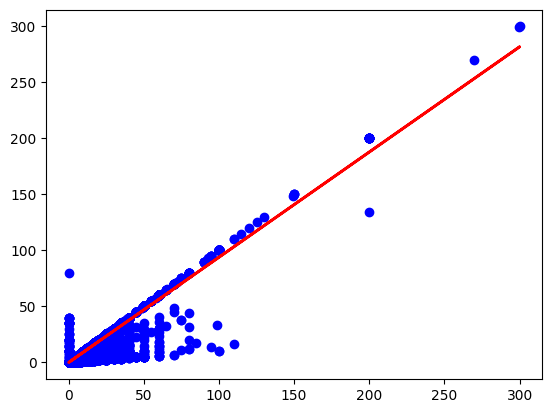

In [16]:
#Visualiza los datos y la línea de regresión ajustada
plt.scatter(train_x, train_y, color='blue')
plt.plot(train_x, linear.predict(train_x), color='red', linewidth=2)
plt.show()